# Assignment 1

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

Show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).

* You can use [`numpy.random.multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html?highlight=multivariate#numpy.random.multivariate_normal) to generate random samples.

(100, 2)
(100, 1)


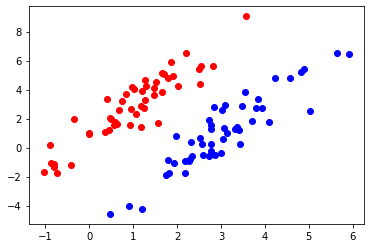

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = [3,1]
sigma1 = [[1,2],[2,5]]
mu2 = [1,3]
sigma2 = [[1,2],[2,5]]
n1 = 50
n2 = 50

X1 = np.random.multivariate_normal(mu1,sigma1,n1)
y1 = np.zeros(n1).reshape((n1,1))
X2 = np.random.multivariate_normal(mu2,sigma2,n2)
y2 = np.ones(n2).reshape((n2,1))
X = np.vstack([X1,X2])
y = np.vstack([y1,y2])
print(X.shape)
print(y.shape)

plt.scatter(X1[:,0],X1[:,1],c="b")
plt.scatter(X2[:,0],X2[:,1],c="r")

## (2) PCA

Apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in / library function of PCA, such as `sklearn.decomposition.PCA`)


a,b 3.3405149047353064 0.0


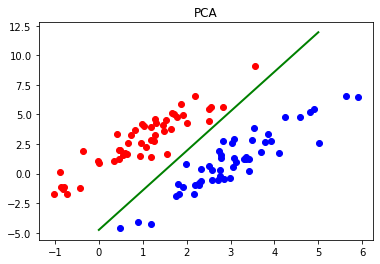

In [23]:
from numpy import linalg as LA
import sklearn

X_mean = np.average(X,axis=0)
X_s = X - X_mean
sigma = np.dot(X_s.T,X_s)
w,v = LA.eig(sigma)
a1 = v[:,np.argmax(w)]

a = a1[1]/a1[0]
b = a1[1] - a*a1[0]

print("a,b",a,b)
line_0x = 0
line_0y = (line_0x-X_mean[0])*a + X_mean[1] + b
line_1x = 5
line_1y = (line_1x-X_mean[0])*a + X_mean[1] + b

plt.title("PCA")
plt.plot((line_0x, line_1x),(line_0y, line_1y),linewidth=2, color='green')
plt.scatter(X1[:,0],X1[:,1],c="b")
plt.scatter(X2[:,0],X2[:,1],c="r")

## (3) LDA

Apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA, such as `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`)

A [ 0.15516274 -0.06677117]
mu [2.00828176 1.95292987]
a,b -2.3237984722099223 2.7139122230470707


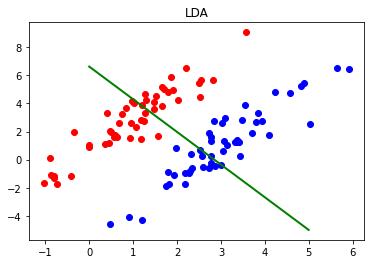

In [22]:
mu1 = np.average(X1,axis=0)
X1_s = X1 - mu1
S1 =  np.dot(X1_s.T,X1_s)
mu2 = np.average(X2,axis=0)
X2_s = X2 - mu2
S2 =  np.dot(X2_s.T,X2_s)
Sw = S1 + S2
A = np.dot(np.linalg.inv(Sw),mu1-mu2)
print("A",A)

mu = (n1*mu1+n2*mu2)/(n1+n2)
a_lda = A[0]/A[1]
b_lda =  -mu[1]*A[1] - A[0]*mu[0]
print("mu",mu)
print("a,b",a_lda,b_lda/A[1])
line_0x = 0
line_0y = (line_0x-mu[0])*a_lda + mu[1]
line_1x = 5
line_1y = (line_1x-mu[0])*a_lda  + mu[1]

plt.title("LDA")
plt.plot((line_0x, line_1x),(line_0y, line_1y),linewidth=2, color='green')
plt.scatter(X1[:,0],X1[:,1],c="b")
plt.scatter(X2[:,0],X2[:,1],c="r")

## (4) Histograms

Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).
* You can use [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) and/or [`matplotlib.pyplot.hist()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist).

(array([ 7., 22., 17.,  4.,  0.,  3., 10., 28.,  8.,  1.]),
 array([-0.18472729, -0.10531928, -0.02591126,  0.05349675,  0.13290476,
         0.21231278,  0.29172079,  0.3711288 ,  0.45053682,  0.52994483,
         0.60935284]),
 <a list of 10 Patch objects>)

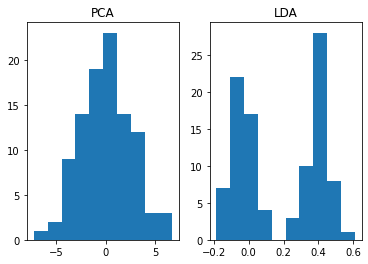

In [21]:
pca_data = np.dot(X_s,a1)
lda_data = np.dot(X,A)

plt.subplot(1,2,1)
plt.title("PCA")
plt.hist(pca_data)
plt.subplot(1,2,2)
plt.title("LDA")
plt.hist(lda_data)

# (5) Discussions

The axis in PCA represents  the direction of maximum variance for the overall data. In contrast, LDA considers the each class of data, and LDA axis represent the direction that maximizes the discriminability index.Discriminability index is between-class scatter over within-class scatter.

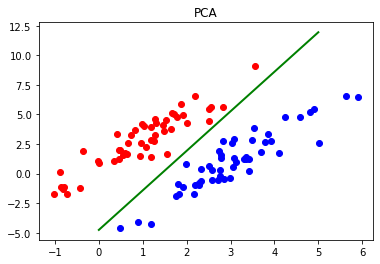
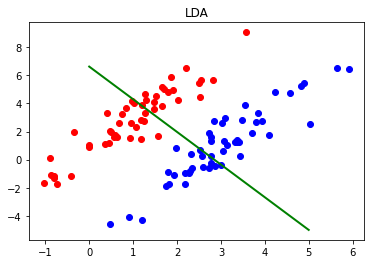

Thus, the 1-d histograms of the sample data transformed by the calculated axes for each methods are as follows. In PCA, the distribution is one peak, but In LDA, it is divided into two.

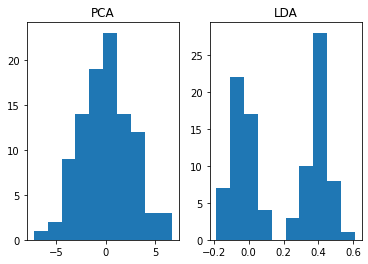